In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
runv92pN = pd.read_csv('data/v9spd_std213s5F2pN.csv', names=['spd','std'])
runv94pN = pd.read_csv('data/v9spd_std213s5F4pN.csv', names=['spd','std'])
runv95pN = pd.read_csv('data/v9spd_std213s5F5pN.csv', names=['spd','std'])
runv98pN = pd.read_csv('data/v9spd_std213s5F8pN.csv', names=['spd','std'])
runv96pN = pd.read_csv('data/v9spd_std213s5F6pN.csv', names=['spd','std'])
runv9 = pd.read_csv('data/v9spd_std213s5F9.2pN.csv', names=['spd','std'])
runv9_2 = pd.read_csv('data/v9spd_std113s5F9.2pN.csv', names=['spd','std'])
runv910pN = pd.read_csv('data/v9spd_std213s5F10pN.csv', names=['spd','std'])

spdStd = pd.read_csv('data/spd_std213.csv', names=['Hspd','Hstd','Hspd01','Hstd01','Tspd','Tstd','Tspd01','Tstd01'])
spdStd113 = pd.read_csv('data/spd_std113.csv', names=['Hspd','Hstd','Hspd01','Hstd01','Tspd','Tstd','Tspd01','Tstd01'])

rv9 = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [3]:
s005 = pd.read_csv('data/spd_std133s5_005.csv', names=['spd','std'])
r005 = np.arange(0.4,1.05,0.05)

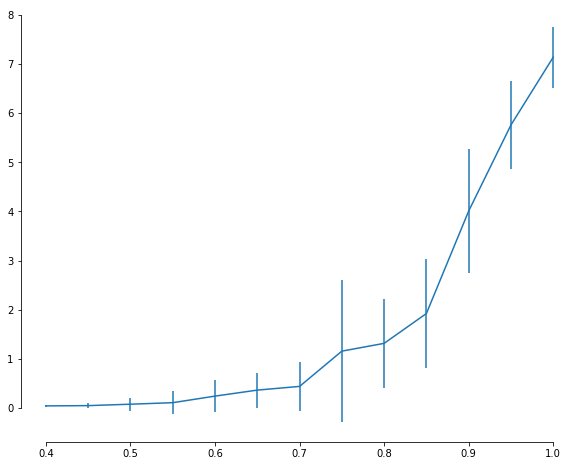

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar(r005,s005['spd'],s005['std'])

#ax.minorticks_on()
#ax.tick_params('both', direction='in', length=9, which='major')
#ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xticks(np.arange(0.4,1.05,0.1))
ax.set_yticks(np.arange(0,9,1))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_bounds(0.4,1.0)
ax.spines['left'].set_bounds(0,8)



plt.show()

In [3]:
B7 = pd.read_csv('data/spd_std131s5R08B7.csv', names=['spd','std'])
B25 = pd.read_csv('data/spd_std133s5R08B25.csv', names=['spd','std'])

In [4]:
B25

,spd,std
0,1.475403,1.169909


In [5]:
runv9['spd']

0    0.040615
1    0.043782
2    0.055300
3    0.051464
4    0.067097
5    0.184313
6    0.461095
7    1.394276
8    4.329817
9    7.270702
Name: spd, dtype: float64

In [6]:
spdStd['Hspd01']

0    0.040616
1    0.043782
2    0.055300
3    0.051465
4    0.067097
5    0.184313
6    0.461095
7    1.394276
8    4.329816
9    7.270702
Name: Hspd01, dtype: float64

In [6]:
np.isclose(spdStd['Hspd01'],runv9['spd'])

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True])

#### 'Hspd' is raw but 'Hspd01' has skipped 10 data points

In [5]:
allRunv9 = np.array([runv9['spd'],runv9_2['spd']])
allRunv9

array([[0.04061534, 0.04378238, 0.05530021, 0.05146437, 0.06709668,
        0.18431343, 0.46109491, 1.39427567, 4.32981656, 7.2707023 ],
       [0.04800652, 0.04775437, 0.04962279, 0.06173239, 0.06129447,
        0.10425967, 0.51593161, 1.06651541, 4.27317702, 7.09453614]])

In [6]:
Av_vel = np.mean(allRunv9,axis=0)
Av_vel

array([0.04431093, 0.04576837, 0.0524615 , 0.05659838, 0.06419557,
       0.14428655, 0.48851326, 1.23039554, 4.30149679, 7.18261922])

In [7]:
vSD = []

for i in range(0,10):
    v = np.array([ allRunv9[0][i],allRunv9[1][i] ])
    vsd=np.sum(((v-Av_vel[i])**2)/(np.size(v)-1)); vsd=np.sqrt(vsd)
    vSD.append(vsd)
vSD = np.array(vSD)
vSD

array([0.00522636, 0.00280862, 0.00401454, 0.00726058, 0.00410278,
       0.05660655, 0.0387754 , 0.23176151, 0.0400502 , 0.12456828])

In [8]:
#test
vSDx=np.sum(((np.array([4.32981656,4.27317702])-4.30149679)**2)/(2-1)); vSDx=np.sqrt(vSDx)
vSDx

0.040050202817286655

In [9]:
allRunv9E = np.array([runv9['std'],runv9_2['std']])
allRunv9Em = np.mean(allRunv9E,axis=0)

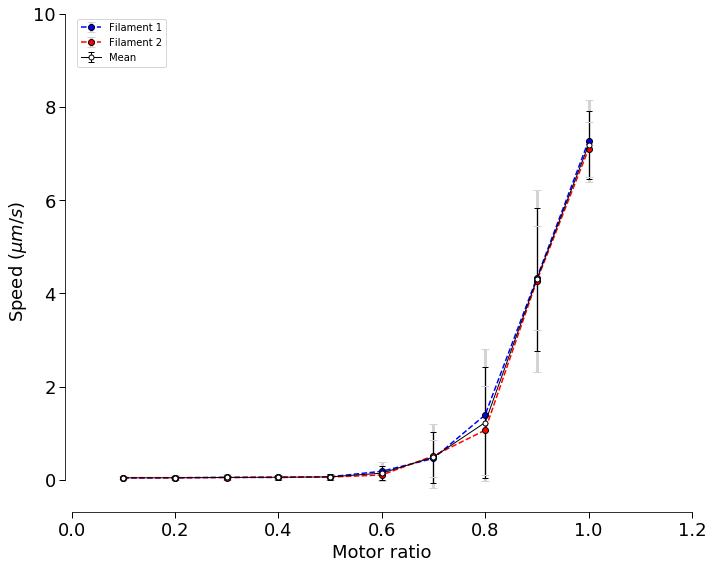

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.style.use('ggplot') # like R figures *
#from pylab import *; rc('axes', linewidth=1)

ax.errorbar(rv9,runv9['spd'],runv9['std'], marker='o', mec='black', linestyle='--', color='blue',\
            ecolor='lightgray', elinewidth=3, capsize=4, label='Filament 1')
ax.errorbar(rv9,runv9_2['spd'],runv9_2['std'], marker='o', mec='black', linestyle='--', color='red',\
            ecolor='lightgray', elinewidth=3, capsize=4, label='Filament 2')

ax.errorbar(rv9,Av_vel,allRunv9Em, capsize=3, linestyle='-', lw=1, color = 'black', mec = 'black', marker='o',\
            markersize=5, markerfacecolor='white', ecolor='black', elinewidth=1, label='Mean')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
ax.spines['left'].set_bounds(0,10)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,1.21,step=0.2))
ax.set_yticks(np.arange(0,11,2))
#ax.set_ylim(ymin=0)

ax.tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=18)
ax.legend(loc='upper left')

fig.tight_layout()
#plt.savefig('fig/MotorRatioChanges.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/MotorRatioChanges.png', fmt='png', dip='1200', bbox_inches='tight')
plt.show()

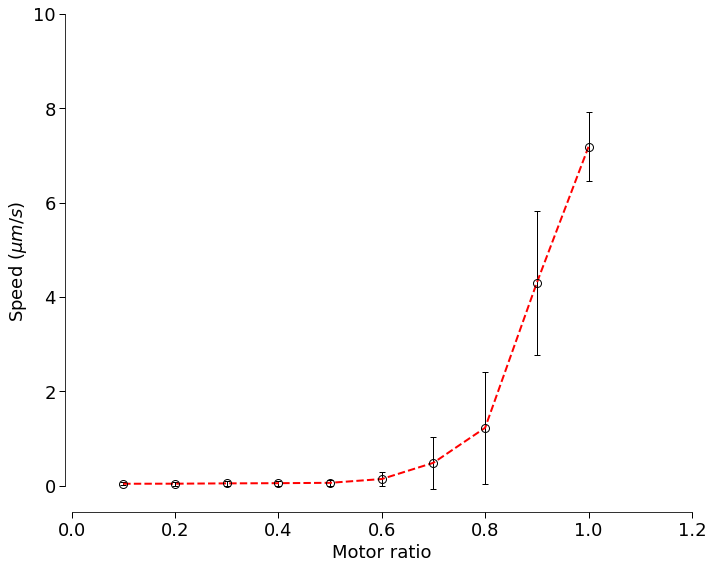

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.style.use('ggplot') # like R figures *
#from pylab import *; rc('axes', linewidth=1)

#ax.errorbar(rv9,runv9['spd'],runv9['std'], marker='o', mec='black', linestyle='--', color='blue',\
            #ecolor='lightgray', elinewidth=3, capsize=4, label='Filament 1')
#ax.errorbar(rv9,runv9_2['spd'],runv9_2['std'], marker='o', mec='black', linestyle='--', color='red',\
            #ecolor='lightgray', elinewidth=3, capsize=4, label='Filament 2')

ax.errorbar(rv9,Av_vel,allRunv9Em, capsize=3, linestyle='--', lw=2, color = 'red', mec = 'black', marker='o',\
            markersize=8, markerfacecolor='none', ecolor='black', elinewidth=1, label='Mean')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
ax.spines['left'].set_bounds(0,10)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,1.21,step=0.2))
ax.set_yticks(np.arange(0,11,2))
#ax.set_ylim(ymin=0)

ax.tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=18)
#ax.legend(loc='upper left')

fig.tight_layout()
#plt.savefig('fig/meanMotorRatioChanges.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/meanMotorRatioChanges.png', fmt='png', dip='1500', bbox_inches='tight')
plt.show()

In [14]:
Av_vel

array([0.04431093, 0.04576837, 0.0524615 , 0.05659838, 0.06419557,
       0.14428655, 0.48851326, 1.23039554, 4.30149679, 7.18261922])

In [14]:
allHspd = np.array([spdStd['Hspd01'],spdStd113['Hspd01']])
Hmn_spd = np.mean(allHspd,axis=0)

allHstd = np.array([spdStd['Hstd01'],spdStd113['Hstd01']])
Hmn_std = np.mean(allHstd,axis=0)

allTspd = np.array([spdStd['Tspd01'],spdStd113['Tspd01']])
Tmn_spd = np.mean(allTspd,axis=0)

allTstd = np.array([spdStd['Tstd01'],spdStd113['Tstd01']])
Tmn_std = np.mean(allTstd,axis=0)

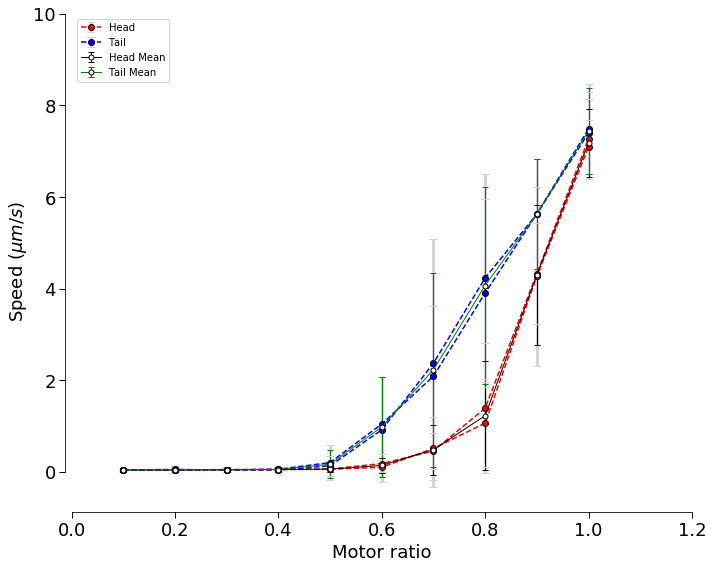

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.style.use('ggplot') # like R figures *
#from pylab import *; rc('axes', linewidth=1)

ax.errorbar(rv9,spdStd['Hspd01'],spdStd['Hstd01'], marker='o', mec='black', linestyle='--', color='red',\
            ecolor='lightgray', elinewidth=3, capsize=4, label='Head')
ax.errorbar(rv9,spdStd['Tspd01'],spdStd['Tstd01'], marker='o', mec='black', linestyle='--', color='blue',\
            ecolor='lightgray', elinewidth=3, capsize=4, label='Tail')

ax.errorbar(rv9,spdStd113['Hspd01'],spdStd113['Hstd01'], marker='o', mec='black', linestyle='--', color='red',\
            ecolor='lightgray', elinewidth=3, capsize=4)#, label='Head')
ax.errorbar(rv9,spdStd113['Tspd01'],spdStd113['Tstd01'], marker='o', mec='black', linestyle='--', color='blue',\
            ecolor='lightgray', elinewidth=3, capsize=4)#, label='Tail')

ax.errorbar(rv9,Hmn_spd,Hmn_std, capsize=3, linestyle='-', lw=1, color = 'black', mec = 'black', marker='o',\
            markersize=5, markerfacecolor='white', ecolor='black', elinewidth=1, label='Head Mean')

ax.errorbar(rv9,Tmn_spd,Tmn_std, capsize=3, linestyle='-', lw=1, color = 'green', mec = 'black', marker='o',\
            markersize=5, markerfacecolor='white', ecolor='green', elinewidth=1, label='Tail Mean')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
ax.spines['left'].set_bounds(0,10)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,1.21,step=0.2))
ax.set_yticks(np.arange(0,11,2))
#ax.set_ylim(ymin=0)

ax.tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=18)
ax.legend(loc='upper left')

fig.tight_layout()
#plt.savefig('fig/MotorRatioChangesSnaking.svg', fmt='svg', dip='1000', bbox_inches='tight')
#plt.savefig('fig/MotorRatioChangesSnaking.png', fmt='png', dip='1000', bbox_inches='tight')
plt.show()

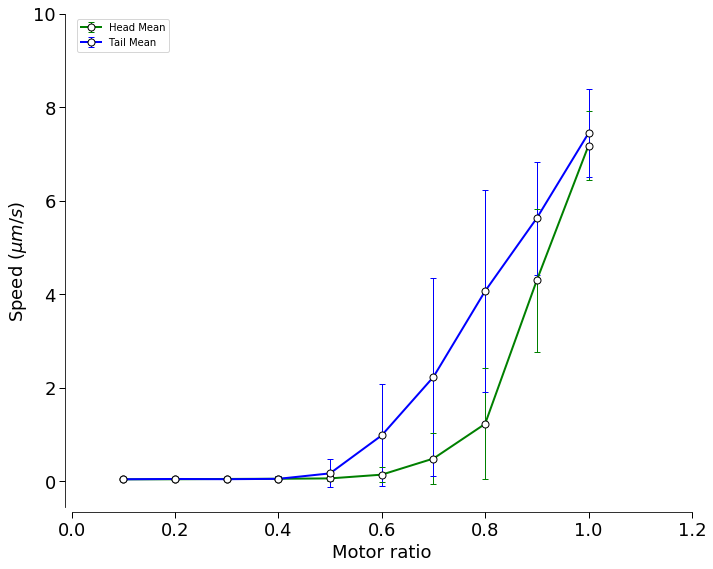

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.style.use('ggplot') # like R figures *
#from pylab import *; rc('axes', linewidth=1)


ax.errorbar(rv9,Hmn_spd,Hmn_std, capsize=3, linestyle='-', lw=2, color = 'green', mec = 'black', marker='o',\
            markersize=7, markerfacecolor='white', ecolor='green', elinewidth=1, label='Head Mean')

ax.errorbar(rv9,Tmn_spd,Tmn_std, capsize=3, linestyle='-', lw=2, color = 'blue', mec = 'black', marker='o',\
            markersize=7, markerfacecolor='white', ecolor='blue', elinewidth=1, label='Tail Mean')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,1.21,step=0.2))
ax.set_yticks(np.arange(0,11,2))
#ax.set_ylim(ymin=0)

ax.tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=18)
ax.legend(loc='upper left')

fig.tight_layout()
#plt.savefig('fig/MotorRatioChangesSnaking_.svg', fmt='svg', dip='1000', bbox_inches='tight')
#plt.savefig('fig/MotorRatioChangesSnaking_.png', fmt='png', dip='1000', bbox_inches='tight')
plt.show()

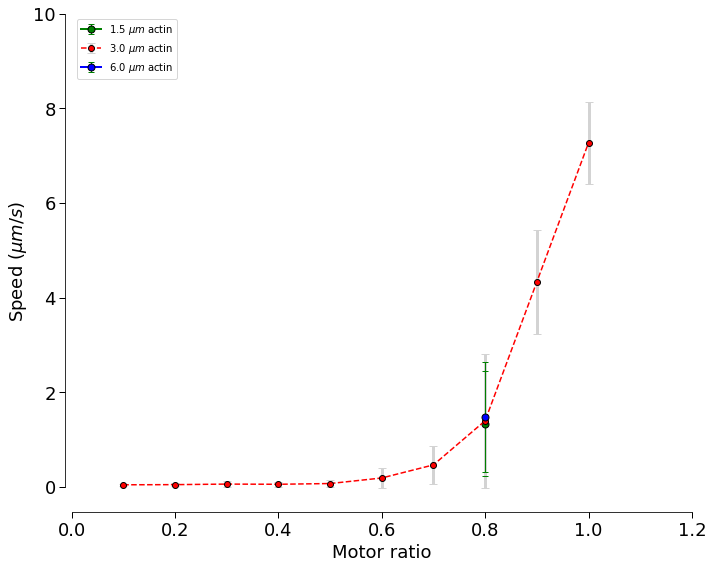

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.style.use('ggplot') # like R figures *
#from pylab import *; rc('axes', linewidth=1)

ax.errorbar([0.8],B7['spd'],B7['std'], capsize=3, linestyle='-', lw=2, color = 'green', mec = 'black', marker='o',\
            markersize=7, markerfacecolor='green', ecolor='green', elinewidth=1, label='1.5 $\mu m$ actin')

ax.errorbar(rv9,spdStd['Hspd01'],spdStd['Hstd01'], marker='o', mec='black', linestyle='--', color='red',\
            ecolor='lightgray', elinewidth=3, capsize=4, label='3.0 $\mu m$ actin')
    
ax.errorbar([0.8],B25['spd'],B25['std'], capsize=3, linestyle='-', lw=2, color = 'blue', mec = 'black', marker='o',\
            markersize=7, markerfacecolor='blue', ecolor='green', elinewidth=1, label='6.0 $\mu m$ actin')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
ax.spines['left'].set_bounds(0,10)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,1.21,step=0.2))
ax.set_yticks(np.arange(0,11,2))
#ax.set_ylim(ymin=0)

ax.tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=18)
ax.legend(loc='upper left')

fig.tight_layout()
#plt.savefig('fig/MotorRatioChangesSnaking_.svg', fmt='svg', dip='1000', bbox_inches='tight')
#plt.savefig('fig/MotorRatioChangesSnaking_.png', fmt='png', dip='1000', bbox_inches='tight')
plt.show()

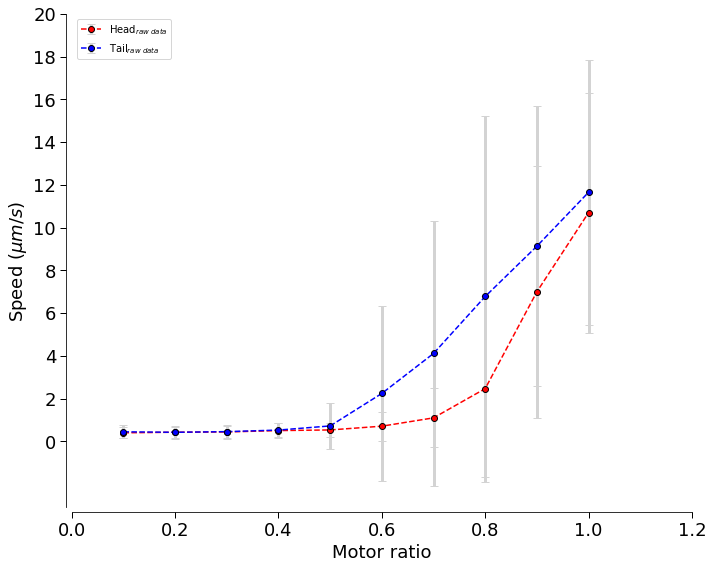

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.style.use('ggplot') # like R figures *
#from pylab import *; rc('axes', linewidth=1)

ax.errorbar(rv9,spdStd['Hspd'],spdStd['Hstd'], marker='o', mec='black', linestyle='--', color='red',\
            ecolor='lightgray', elinewidth=3, capsize=4, label='Head$_{raw\ data}$')
ax.errorbar(rv9,spdStd['Tspd'],spdStd['Tstd'], marker='o', mec='black', linestyle='--', color='blue',\
            ecolor='lightgray', elinewidth=3, capsize=4, label='Tail$_{raw\ data}$')

#ax.errorbar(rv9,Av_vel,allRunv9Em, capsize=3, linestyle='-', lw=1, color = 'black', mec = 'black', marker='o',\
#            markersize=5, markerfacecolor='white', ecolor='black', elinewidth=1, label='Mean')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,1.21,step=0.2))
ax.set_yticks(np.arange(0,22,2))
#ax.set_ylim(ymin=0)

ax.tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=18)
ax.legend(loc='upper left')

fig.tight_layout()
#plt.savefig('fig/MotorRatioChanges.svg', fmt='svg', dip='1000', bbox_inches='tight')
#plt.savefig('fig/MotorRatioChanges.png', fmt='png', dip='1000', bbox_inches='tight')
plt.show()

In [16]:
#runv92pN = pd.read_csv('v9spd_std213s5F2pN.csv', names=['spdF2pN','stdevF2pN'])
#runv94pN = pd.read_csv('v9spd_std213s5F4pN.csv', names=['spdF4pN','stdevF4pN'])
#runv95pN = pd.read_csv('v9spd_std213s5F5pN.csv', names=['spdF5pN','stdevF5pN'])
#runv98pN = pd.read_csv('v9spd_std213s5F8pN.csv', names=['spdF8pN','stdevF8pN'])
#runv96pN = pd.read_csv('v9spd_std213s5F6pN.csv', names=['spdF6pN','stdevF6pN'])
#runv9 = pd.read_csv('v9spd_std213s5F9.2pN.csv', names=['spdF9.2pN','stdevF9.2pN'])
#runv910pN = pd.read_csv('v9spd_std213s5F10pN.csv', names=['spdF10pN','stdF10pN'])

#rv9 = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#R = pd.DataFrame(data=rv9, columns=["R"])

In [17]:
#result = pd.concat([R,runv92pN,runv94pN,runv95pN,runv96pN,runv98pN,runv9,runv910pN], axis=1, sort=False)

In [18]:
#result.to_csv('ratioSpeed.csv',index=False)

Text(0, 0.5, 'Speed ($\\mu m/s$)')

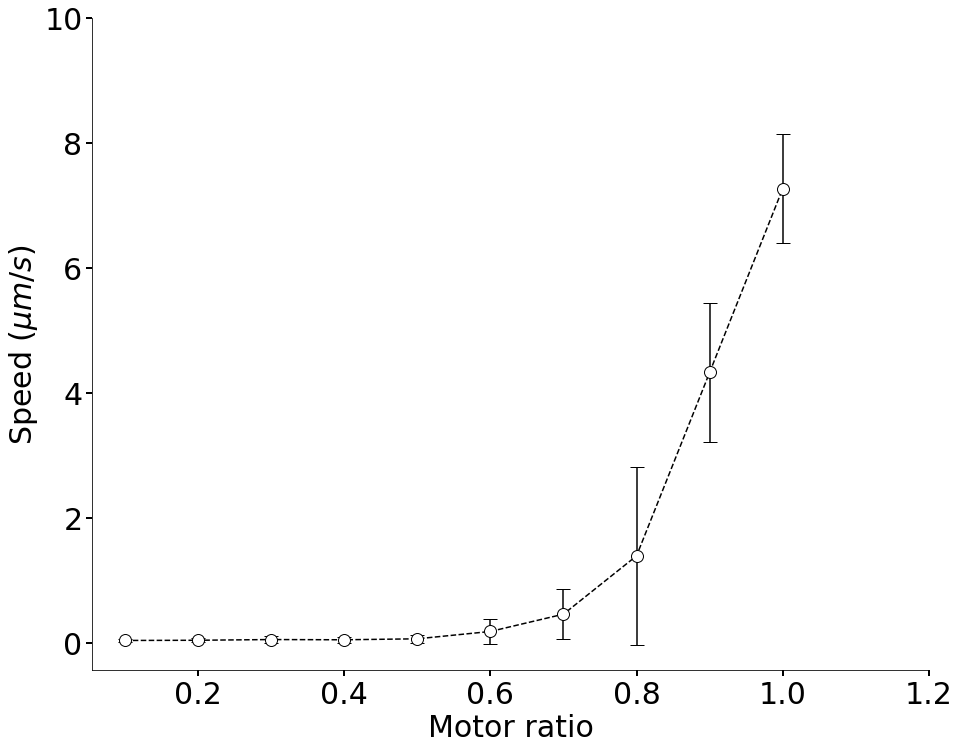

In [19]:
fig, ax = plt.subplots(figsize=(15,12))

#from pylab import *
#rc('axes', linewidth=4)

#ax.errorbar(rv9,runv92pN['spd'],runv92pN['std'], capsize=3, linestyle='--',color='yellow', marker='o', ecolor='yellow', label='$F_{M_2}$ = 2.0 pN')

#ax.errorbar(rv9[0:6],runv92pN[0:6]['spd'],runv92pN[0:6]['std'], mec='grey', capsize=3, linestyle='--',color='cyan', marker='o', markersize=7, ecolor='grey', label='')

#ax.errorbar(rv9,runv94pN['spd'],runv94pN['std'], capsize=3, linestyle='--',color='green', marker='o', ecolor='green', label='$F_{M_2}$ = 4.0 pN')
#ax.errorbar(rv9,runv95pN['spd'],runv95pN['std'], capsize=3, linestyle='--',color='red', marker='o', ecolor='red', label='$F_{M_2}$ = 5.0 pN')
#ax.errorbar(rv9,runv96pN['spd'],runv96pN['std'], capsize=3, linestyle='--',color='magenta', marker='o', ecolor='magenta', label='$F_{M_2}$ = 6.0 pN')
#ax.errorbar(rv9,runv98pN['spd'],runv98pN['std'], capsize=3, linestyle='--',color='purple', marker='o', ecolor='purple', label='$F_{M_2}$ = 8.0 pN')


ax.errorbar(rv9,runv9['spd'],runv9['std'], capsize=7, linestyle='--', color = 'black', mec = 'black', marker='o', markersize=12, markerfacecolor='white')#, ecolor='blue')#, label='$F_{M_2}$ = 9.2 pN')


#ax.errorbar(rv9,runv910pN['spd'],runv910pN['std'], capsize=3, linestyle='--',color='black', marker='o', ecolor='black', label='$F_{M_2}$ = 10.0 pN')


##ax.errorbar(rv9[1:2],runv95pN[1:2]['spd'],runv95pN[1:2]['std'], mec='grey', capsize=3, linestyle='--',color='cyan', marker='o', markersize=7, ecolor='grey', label='')
##ax.errorbar(rv9[0:6],runv92pN[0:6]['spd'],runv92pN[0:6]['std'], mec='grey', capsize=3, linestyle='--',color='cyan', marker='o', markersize=7, ecolor='grey', label='')
#ax.errorbar(rv9[0:6],runv94pN[0:6]['spd'],runv94pN[0:6]['std'], mec='grey', capsize=3, linestyle='--',color='cyan', marker='o', markersize=7, ecolor='grey', label='Detached')
##ax.errorbar(rv9[6:7],runv98pN[6:7]['spd'],runv98pN[6:7]['std'], mec='grey', capsize=3, linestyle='--',color='yellow', marker='o', markersize=7, ecolor='grey', label='Deficiency detach')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticks(np.arange(0,12,2))
ax.set_xticks(np.arange(0.2,1.21,0.2))
#ax.tick_params(labelsize=30)

ax.tick_params(labelsize=30, direction='out', length=6, width=2)#, colors='r', grid_color='r', grid_alpha=0.5)

ax.set_xlabel('Motor ratio', fontsize=30)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=30)

#ax.legend()

#plt.savefig('fig/v9RvsSpd.png', fmt='png', dpi=1000, bbox_inches='tight')
#plt.savefig('fig/v9RvsSpd.svg', fmt='svg', dpi=1000, bbox_inches='tight')
#plt.savefig('fig/v9RvsSpd.emf', fmt='emf', dpi=3000, bbox_inches='tight')

In [20]:
avM = []

for d in range(0,7):
    avM_ = pd.read_csv('data/v9mtrs_std213s5F'+str(d)+'pN.csv', names=['spec1','dev1','spec2','dev2'])
    avM.append(avM_)

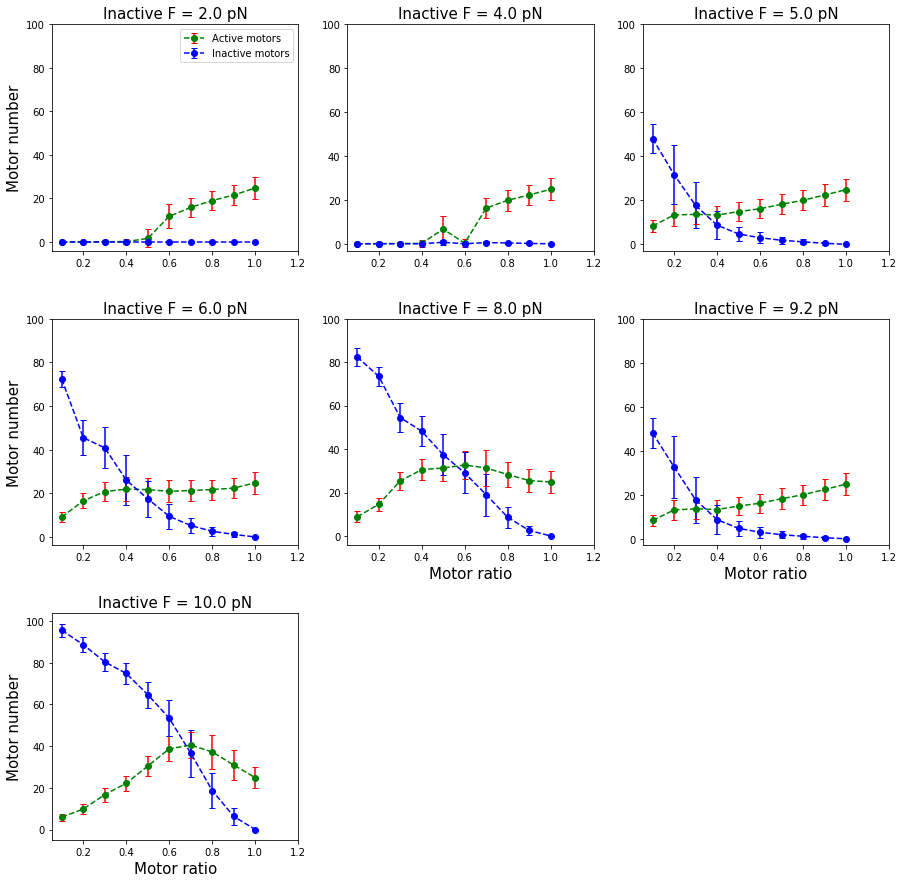

In [34]:
plt.figure(figsize=(15,15))

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.3)

for g in range(0,7):
    plt.subplot(3,3,g+1)
    plt.errorbar(rv9,avM[g]['spec1'],avM[g]['dev1'], capsize=3, linestyle='--', color='green', marker='o', ecolor='red', label='Active motors')
    plt.errorbar(rv9,avM[g]['spec2'],avM[g]['dev2'], capsize=3, linestyle='--', color='blue', marker='o', ecolor='blue', label='Inactive motors')
    plt.yticks(np.arange(0,111,20))
    plt.xticks(np.arange(0.2,1.21,0.2))
    if g == 0:
        plt.title('Inactive F = 2.0 pN', fontsize=15)
        plt.ylabel('Motor number', fontsize=15)
        plt.legend()
    if g == 1:
        plt.title('Inactive F = 4.0 pN', fontsize=15)
    if g == 2:
        plt.title('Inactive F = 5.0 pN', fontsize=15)
    if g == 3:
        plt.title('Inactive F = 6.0 pN', fontsize=15)
        plt.ylabel('Motor number', fontsize=15)
        #plt.xlabel('Motor ratio')
    if g == 4:
        plt.title('Inactive F = 8.0 pN', fontsize=15)
        plt.xlabel('Motor ratio', fontsize=15)
    if g == 5:
        plt.title('Inactive F = 9.2 pN', fontsize=15)
        plt.xlabel('Motor ratio', fontsize=15)
    if g == 6:
        plt.title('Inactive F = 10.0 pN', fontsize=15)
        plt.ylabel('Motor number', fontsize=15)
        plt.xlabel('Motor ratio', fontsize=15)

#plt.savefig('fig/v9RvsNo.png', fmt='png', dpi=1000, bbox_inches='tight')
#plt.savefig('fig/v9RvsNo.svg', fmt='svg', dpi=1000, bbox_inches='tight')

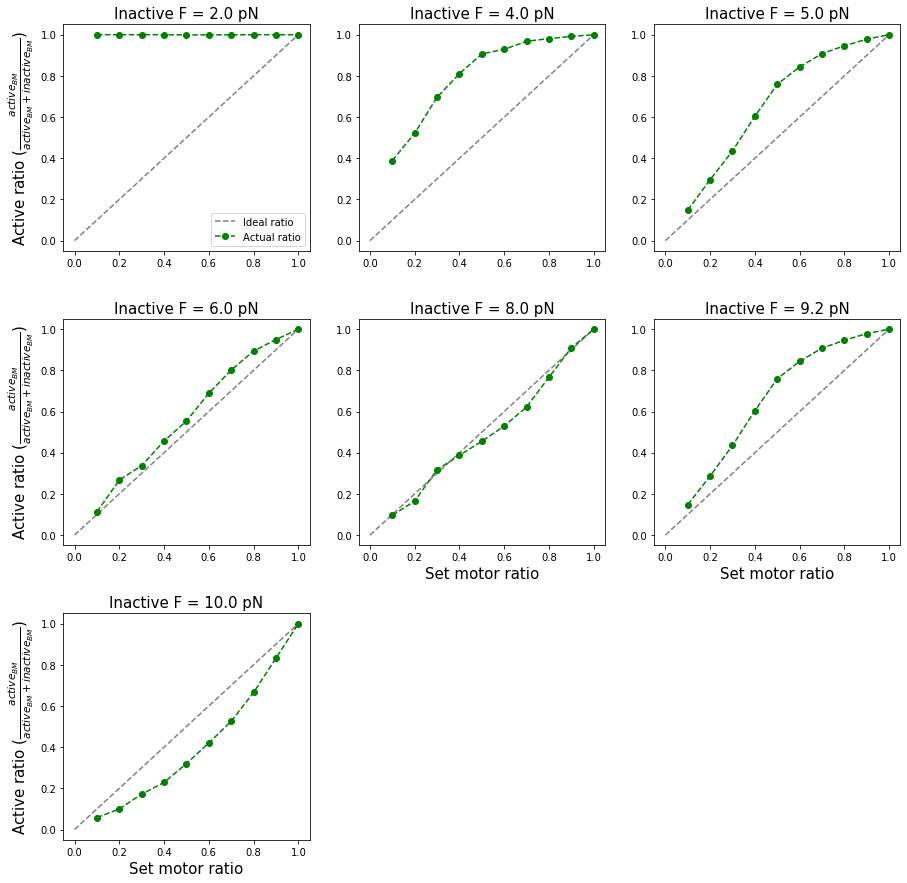

In [40]:
plt.figure(figsize=(15,15))

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.3)

for g in range(0,7):
    plt.subplot(3,3,g+1)
    plt.errorbar(rv9,avM[g]['spec1']/(avM[g]['spec1']+avM[g]['spec2']), linestyle='--', color='green', marker='o', ecolor='red', label='Actual ratio')
    #plt.errorbar(rv9,avM[g]['spec2'],avM[g]['dev2'], capsize=3, linestyle='--', color='blue', marker='o', ecolor='blue', label='Inactive motors')
    plt.plot([0,1],[0,1], color='grey', linestyle='--', label='Ideal ratio')
    plt.yticks(np.arange(0.0,1.1,0.2))
    plt.xticks(np.arange(0.0,1.1,0.2))
    if g == 0:
        plt.title('Inactive F = 2.0 pN', fontsize=15)
        plt.ylabel(r'Active ratio ($\frac{active_{BM}}{active_{BM}+inactive_{BM}}$)', fontsize=15)
        plt.legend()
    if g == 1:
        plt.title('Inactive F = 4.0 pN', fontsize=15)
    if g == 2:
        plt.title('Inactive F = 5.0 pN', fontsize=15)
    if g == 3:
        plt.title('Inactive F = 6.0 pN', fontsize=15)
        plt.ylabel(r'Active ratio ($\frac{active_{BM}}{active_{BM}+inactive_{BM}}$)', fontsize=15)
        #plt.xlabel('Set motor ratio')
    if g == 4:
        plt.title('Inactive F = 8.0 pN', fontsize=15)
        plt.xlabel('Set motor ratio', fontsize=15)
    if g == 5:
        plt.title('Inactive F = 9.2 pN', fontsize=15)
        plt.xlabel('Set motor ratio', fontsize=15)
    if g == 6:
        plt.title('Inactive F = 10.0 pN', fontsize=15)
        plt.xlabel('Set motor ratio', fontsize=15)
        plt.ylabel(r'Active ratio ($\frac{active_{BM}}{active_{BM}+inactive_{BM}}$)', fontsize=15)
        
#plt.savefig('fig/v9SetvsActive.svg', fmt='png', dpi=1000, bbox_inches='tight')
#plt.savefig('fig/v9SetvsActive.svg', fmt='svg', dpi=1000, bbox_inches='tight')